In [1]:
import os
import time
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import yfinance as yf

# News sentiment data

In [28]:
data_path = os.path.join('.', 'data', 'with_sentiment')

In [76]:
all_data = pd.DataFrame({'text': [], 'sentiment': []})

In [110]:
df = pd.read_csv(os.path.join(data_path, 'valid_data.csv'))

In [111]:
df

,text,label
0,Analyst call of the day for @CNBCPro subscribe...,0
1,"Loop upgrades CSX to buy, says it's a good pla...",0
2,BofA believes we're already in a recession — a...,0
3,JPMorgan sees these derivative plays as best w...,0
4,Morgan Stanley's Huberty sees Apple earnings m...,0
...,...,...
4112,Dollar bonds of Chinese developers fall as str...,3
4113,Longer maturity Treasury yields have scope to ...,3
4114,Pimco buys €1bn of Apollo buyout loans from ba...,3
4115,Analysis: Banks' snubbing of junk-rated loan f...,3


In [101]:
df = df[['true_sentiment', 'text']]
df

,true_sentiment,text
0,Positive,The Euro was able to appreciate particularly s...
1,Positive,EUR/CHF yesterday broke above 1.00. Economists...
2,Neutral,EUR/CHF vaults parity for the first time since...
3,Positive,EUR/CHF climbs back above parity. Economists a...
4,Positive,EUR/CHF has broken out above the sideways rang...
...,...,...
2286,Positive,The GBP/USD pair enters a bullish consolidatio...
2287,Negative,EUR/CHF has turned back lower over the past co...
2288,Neutral,The European Central Bank (ECB)downshifted to ...
2289,Positive,Economists at Credit Suisse discuss GBP outloo...


In [112]:
df = df.rename(columns={'label': 'sentiment', 'text': 'text'})
df

,text,sentiment
0,Analyst call of the day for @CNBCPro subscribe...,0
1,"Loop upgrades CSX to buy, says it's a good pla...",0
2,BofA believes we're already in a recession — a...,0
3,JPMorgan sees these derivative plays as best w...,0
4,Morgan Stanley's Huberty sees Apple earnings m...,0
...,...,...
4112,Dollar bonds of Chinese developers fall as str...,3
4113,Longer maturity Treasury yields have scope to ...,3
4114,Pimco buys €1bn of Apollo buyout loans from ba...,3
4115,Analysis: Banks' snubbing of junk-rated loan f...,3


In [113]:
all_data = pd.concat([all_data, df], ignore_index=True)
all_data

,text,sentiment
0,ReutersPayments companies and banks are at log...,Negative
1,AgenciesThe bank presently has 20 million acti...,Positive
2,PTIKarnataka Chief Minister Basavaraj Bommai.K...,Positive
3,Getty ImagesThe budget for FY22 had imposed in...,Negative
4,AgenciesThere is a view in the insurance indus...,Positive
...,...,...
34481,Dollar bonds of Chinese developers fall as str...,3
34482,Longer maturity Treasury yields have scope to ...,3
34483,Pimco buys €1bn of Apollo buyout loans from ba...,3
34484,Analysis: Banks' snubbing of junk-rated loan f...,3


In [114]:
all_data.to_csv('sentiment_dataset.csv')

---

In [2]:
import pandas as pd

df1 = pd.read_parquet("hf://datasets/FinGPT/fingpt-sentiment-cls/data/train-00000-of-00001-921f33f83a4110cb.parquet")
df2 = pd.read_parquet("hf://datasets/FinGPT/fingpt-sentiment-train/data/train-00000-of-00001-dabab110260ac909.parquet")

In [3]:
df1.head()

,input,output,instruction
0,Starbucks says the workers violated safety pol...,negative,Determine the sentiment expressed in the news ...
1,$brcm raises revenue forecast,positive,Determine the sentiment expressed in the tweet...
2,Google parent Alphabet Inc. reported revenue a...,negative,Characterize the news's sentiment using the fo...
3,Here we highlight some top-ranked technology E...,positive,Characterize the news's sentiment using the fo...
4,$UVXY Put the chum out there at key support th...,negative,What is the sentiment of the input tweet from ...


In [6]:
df2.head()

,input,output,instruction
0,"Teollisuuden Voima Oyj , the Finnish utility k...",neutral,What is the sentiment of this news? Please cho...
1,Sanofi poaches AstraZeneca scientist as new re...,neutral,What is the sentiment of this news? Please cho...
2,Starbucks says the workers violated safety pol...,moderately negative,What is the sentiment of this news? Please cho...
3,$brcm raises revenue forecast,positive,What is the sentiment of this tweet? Please ch...
4,Google parent Alphabet Inc. reported revenue a...,moderately negative,What is the sentiment of this news? Please cho...


In [8]:
df1 = df1.drop(columns=['instruction'])
df2 = df2.drop(columns=['instruction'])

In [9]:
df = pd.concat([df1, df2], ignore_index=True)
df

,input,output
0,Starbucks says the workers violated safety pol...,negative
1,$brcm raises revenue forecast,positive
2,Google parent Alphabet Inc. reported revenue a...,negative
3,Here we highlight some top-ranked technology E...,positive
4,$UVXY Put the chum out there at key support th...,negative
...,...,...
124324,"BP, Statoil, to Withdraw Staff From Algeria Fo...",negative
124325,NEW YORK — A fire broke out late Wednesday at ...,mildly negative
124326,Operating profit margin increased from 11.2 % ...,positive
124327,$vxx adding to position here !,positive


In [10]:
df.to_csv('fingpt_sentiment.csv')

# News with timestamps

In [76]:
df1 = pl.read_csv('hf://datasets/Shadow-Blade/financialNews/financialNews.csv')

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: 38e56069-12d3-4ab6-bf44-836416bbbe8c)')' thrown while requesting GET https://huggingface.co/datasets/Shadow-Blade/financialNews/resolve/main/financialNews.csv
Retrying in 1s [Retry 1/5].
'(ReadTimeoutError("HTTPSConnectionPool(host='cdn-lfs-us-1.hf.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: af45b761-11aa-4628-8408-306d8af41313)')' thrown while requesting GET https://huggingface.co/datasets/Shadow-Blade/financialNews/resolve/main/financialNews.csv
Retrying in 2s [Retry 2/5].


In [79]:
df1 = df1[['datetime', 'title', 'description', 'ticker']]

In [80]:
df1

datetime,title,description,ticker
str,str,str,str
"""Fri 24 Nov 202…","""OpenAI turmoil…","""Microsoft chie…","""MSFT"""
"""Thu 23 Nov 202…","""10 Can’t Miss …","""The biggest sh…","""COST"""
"""Thu 23 Nov 202…","""UPDATE 1-Germa…","""German trade u…","""AMZN"""
"""Thu 23 Nov 202…","""Corrections & …","""The success of…","""BMY"""
"""Thu 23 Nov 202…","""EU mulls wider…","""The European U…","""GOOGL"""
"""Thu 23 Nov 202…","""EU mulls wider…","""The European U…","""GOOG"""
"""Thu 23 Nov 202…","""EU mulls wider…","""The European U…","""AMZN"""
"""Thu 23 Nov 202…","""EU mulls wider…","""The European U…","""MSFT"""
"""Thu 23 Nov 202…","""Dow Jones Futu…","""The market ral…","""NVDA"""


In [81]:
df1 = df1.rename({'description': 'text'})

In [84]:
df1 = df1.with_columns(
    pl.col("datetime")
    .str.strptime(pl.Datetime, format="%a %d %b %Y, %I:%M%p")
    .dt.replace_time_zone("UTC")
)

In [85]:
df1['datetime'][0]

datetime.datetime(2023, 11, 24, 0, 0, tzinfo=zoneinfo.ZoneInfo(key='UTC'))

---

In [93]:
df2 = pl.read_parquet('hf://datasets/sabareesh88/FNSPID_nasdaq/data/train-*.parquet')

In [94]:
df2 = df2[['Date', 'Article_title', 'Stock_symbol', 'Article']]

In [95]:
df2.head()

Date,Article_title,Stock_symbol,Article
str,str,str,str
"""2023-12-16 23:…","""Interesting A …","""A""","""Investors in A…"
"""2023-12-12 00:…","""Wolfe Research…","""A""","""Fintel reports…"
"""2023-12-12 00:…","""Agilent Techno…","""A""","""In recent trad…"
"""2023-12-07 00:…","""Agilent (A) En…","""A""","""Agilent Techno…"
"""2023-12-07 00:…","""Pre-Market Mos…","""A""","""The NASDAQ 100…"


In [96]:
df2 = df2.rename({'Date': 'datetime', 'Article_title': 'title', 'Stock_symbol': 'ticker', 'Article': 'text'})

In [97]:
df2 = df2.with_columns(
    pl.col("datetime")
    .str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S UTC")
    .dt.replace_time_zone("UTC")
)

In [98]:
df2

datetime,title,ticker,text
"datetime[μs, UTC]",str,str,str
2023-12-16 23:00:00 UTC,"""Interesting A …","""A""","""Investors in A…"
2023-12-12 00:00:00 UTC,"""Wolfe Research…","""A""","""Fintel reports…"
2023-12-12 00:00:00 UTC,"""Agilent Techno…","""A""","""In recent trad…"
2023-12-07 00:00:00 UTC,"""Agilent (A) En…","""A""","""Agilent Techno…"
2023-12-07 00:00:00 UTC,"""Pre-Market Mos…","""A""","""The NASDAQ 100…"
2023-12-05 00:00:00 UTC,"""A Quantitative…","""A""","""Below is Valid…"
2023-11-24 00:00:00 UTC,"""The Zacks Anal…","""A""","""For Immediate …"
2023-11-22 00:00:00 UTC,"""3 Biotech Stoc…","""A""","""InvestorPlace …"
2023-11-22 00:00:00 UTC,"""Top Research R…","""A""","""Wednesday, Nov…"


---

In [100]:
df3 = pl.read_csv(os.path.join('.', 'data', 'headlines.csv'))
df3

headline,url,publisher,date,stock
str,str,str,str,str
"""Steel ETF's Br…","""https://www.be…","""webmaster""","""2010-02-03 00:…","""SLX"""
"""A World Cup ET…","""https://www.be…","""webmaster""","""2010-02-03 00:…","""PPLT"""
"""Time to Bail O…","""https://www.be…","""webmaster""","""2010-02-04 00:…","""LLL"""
"""Cresud's Parts…","""https://www.be…","""webmaster""","""2010-02-04 00:…","""CRESY"""
"""A Consumer-Sta…","""https://www.be…","""webmaster""","""2010-02-04 00:…","""XLP"""
"""No Fear of Sma…","""https://www.be…","""webmaster""","""2010-02-05 00:…","""HCP"""
"""An Opportunity…","""https://www.be…","""webmaster""","""2010-02-08 00:…","""CXW"""
"""Harman Breaks …","""https://www.be…","""webmaster""","""2010-02-09 00:…","""HAR"""
"""Let the Bulls …","""https://www.be…","""webmaster""","""2010-02-09 00:…","""SBAC"""


In [101]:
df3 = df3.rename({'headline': 'title', 'date': 'datetime', 'stock': 'ticker'})

In [102]:
df3 = df3[['title', 'datetime', 'ticker']]

In [103]:
df3 = df3.with_columns(df3['title'].alias('text'))

In [105]:
df3 = df3.with_columns(
    pl.col("datetime")
    .str.strptime(pl.Datetime, format="%Y-%m-%d %H:%M:%S")
    .dt.replace_time_zone("UTC")
)

## Merge

In [106]:
df1 = df1.select(['datetime', 'ticker', 'title', 'text'])
df2 = df2.select(['datetime', 'ticker', 'title', 'text'])
df3 = df3.select(['datetime', 'ticker', 'title', 'text'])

df = pl.concat([df1, df2, df3])
df.shape

(2264962, 4)

In [109]:
df = df.sort("datetime", descending=True)
df

datetime,ticker,title,text
"datetime[μs, UTC]",str,str,str
2024-01-09 00:00:00 UTC,"""AMD""","""Is iShares Sem…","""The iShares Se…"
2024-01-09 00:00:00 UTC,"""AMD""","""Stock Market N…","""U.S. stock mar…"
2024-01-09 00:00:00 UTC,"""AMD""","""Japan's Nikkei…","""TOKYO, Jan 9 (…"
2024-01-09 00:00:00 UTC,"""AMD""","""Will Advanced …","""The trillion-d…"
2024-01-09 00:00:00 UTC,"""AMD""","""Zacks Industry…","""For Immediate …"
2024-01-09 00:00:00 UTC,"""AMD""","""AMD Strengthen…","""Advanced Micro…"
2024-01-09 00:00:00 UTC,"""AMD""","""AMD Quantitati…","""Below is Valid…"
2024-01-08 00:00:00 UTC,"""AMD""","""4 Electronics …","""The challengin…"
2024-01-08 00:00:00 UTC,"""AMD""","""3 Technology T…","""InvestorPlace …"


In [112]:
# drop last row
df = df.slice(0, df.height - 1)

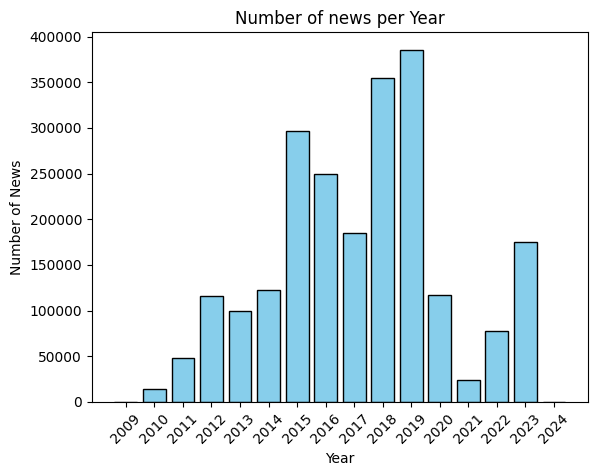

In [115]:
hist_data = df.with_columns(pl.col("datetime").dt.year().alias("year")) \
              .groupby("year") \
              .count()

years = hist_data["year"].to_list()
counts = hist_data["count"].to_list()

plt.bar(years, counts, color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of News")
plt.title("Number of news per Year")
plt.xticks(years, rotation=45)
plt.show()

In [116]:
df = df.filter(pl.col("datetime").dt.year() >= 2012)

In [117]:
df.write_parquet('all_news.parquet')

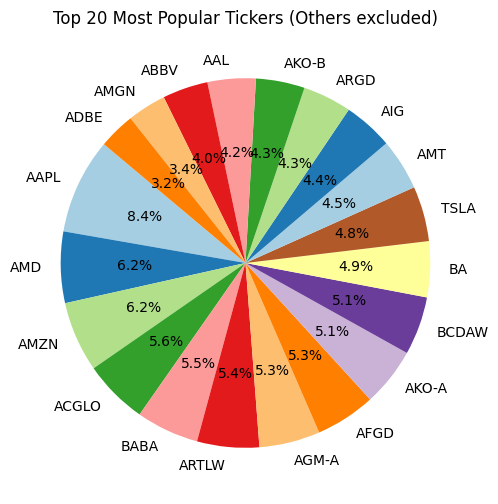

In [128]:
ticker_counts = df.groupby("ticker").agg(pl.col("ticker").count().alias("count"))
ticker_counts = ticker_counts.sort("count", descending=True)

top_20 = ticker_counts.head(20)
top_20 = top_20.with_columns(pl.col("count").cast(pl.Int64))

labels = top_20["ticker"].to_list()
sizes = top_20["count"].to_list()

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 20 Most Popular Tickers (Others excluded)")
plt.show()

In [138]:
with open('nasdaq100.txt', 'r') as file:
    nasdaq100 = [x.strip() for x in file.readlines()]
nasdaq100[:10]

['AAPL',
 'NVDA',
 'MSFT',
 'AMZN',
 'GOOG',
 'GOOGL',
 'META',
 'AVGO',
 'TSLA',
 'NFLX']

In [140]:
nasdaq_df = df.filter(pl.col("ticker").is_in(nasdaq100))
nasdaq_df.shape

(139347, 4)

In [142]:
nasdaq_df.write_parquet('nasdaq100_news.parquet')

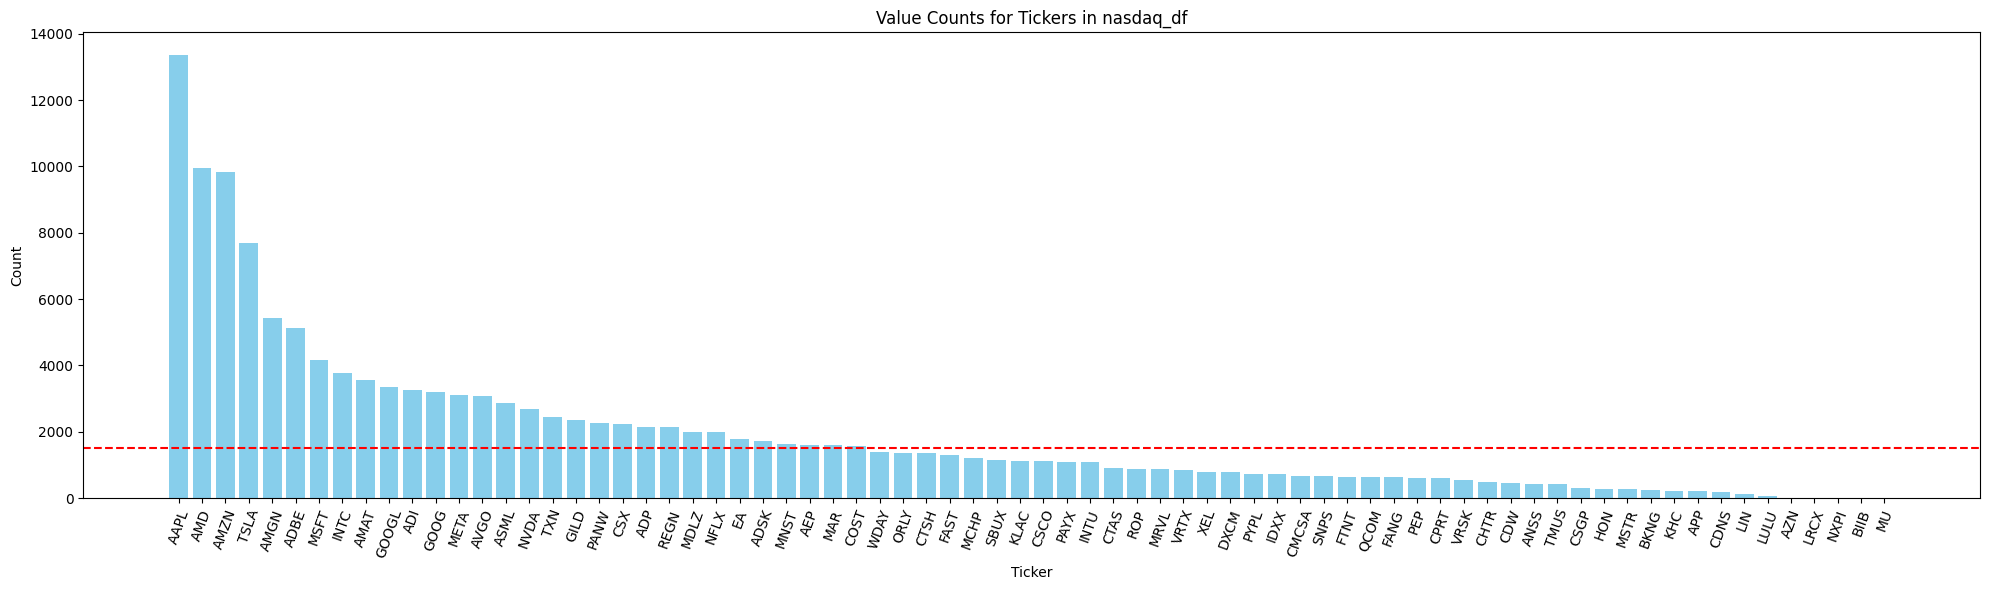

In [155]:
value_counts = nasdaq_df.groupby('ticker').agg(pl.count().alias('count'))
value_counts = value_counts.to_pandas().sort_values('count', ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(value_counts['ticker'], value_counts['count'], color='skyblue')
plt.xlabel('Ticker')
plt.ylabel('Count')
plt.title('Value Counts for Tickers in nasdaq_df')
plt.xticks(rotation=70)
plt.axhline(y=1500, color='r', linestyle='--', label='y = 1500')
plt.tight_layout()
plt.show()

In [157]:
value_counts = nasdaq_df.groupby('ticker').agg(pl.count().alias('count'))
tickers_to_keep = value_counts.filter(pl.col('count') >= 1500).select('ticker')
nasdaq_df = nasdaq_df.join(tickers_to_keep, on='ticker', how='inner')
nasdaq_df

datetime,ticker,title,text
"datetime[μs, UTC]",str,str,str
2024-01-09 00:00:00 UTC,"""AMD""","""Is iShares Sem…","""The iShares Se…"
2024-01-09 00:00:00 UTC,"""AMD""","""Stock Market N…","""U.S. stock mar…"
2024-01-09 00:00:00 UTC,"""AMD""","""Japan's Nikkei…","""TOKYO, Jan 9 (…"
2024-01-09 00:00:00 UTC,"""AMD""","""Will Advanced …","""The trillion-d…"
2024-01-09 00:00:00 UTC,"""AMD""","""Zacks Industry…","""For Immediate …"
2024-01-09 00:00:00 UTC,"""AMD""","""AMD Strengthen…","""Advanced Micro…"
2024-01-09 00:00:00 UTC,"""AMD""","""AMD Quantitati…","""Below is Valid…"
2024-01-08 00:00:00 UTC,"""AMD""","""4 Electronics …","""The challengin…"
2024-01-08 00:00:00 UTC,"""AMD""","""3 Technology T…","""InvestorPlace …"


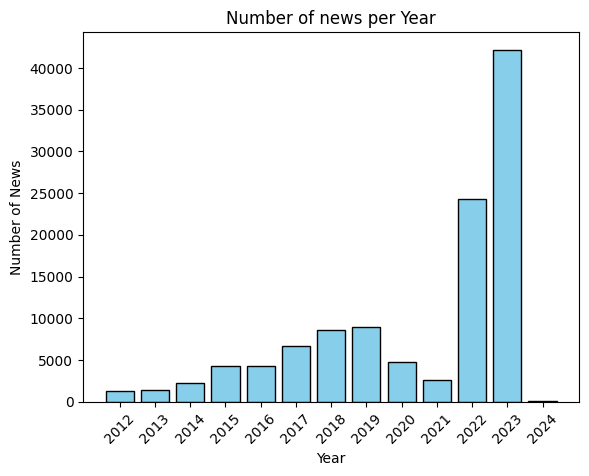

In [158]:
hist_data = nasdaq_df.with_columns(pl.col("datetime").dt.year().alias("year")) \
              .groupby("year") \
              .count()

years = hist_data["year"].to_list()
counts = hist_data["count"].to_list()

plt.bar(years, counts, color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of News")
plt.title("Number of news per Year")
plt.xticks(years, rotation=45)
plt.show()

In [164]:
len(set(nasdaq_df['ticker']))

30

In [165]:
nasdaq_df.write_parquet('nasdaq30_news.parquet')

# Download stocks data

In [6]:
nasdaq_df = pd.read_parquet('nasdaq30_news.parquet')

In [7]:
tickers = list(set(nasdaq_df['ticker']))

In [9]:
stocks_data_path = os.path.join('.', 'data', 'stocks')

In [28]:
for ticker in tqdm(tickers):
    daily_data = yf.download(ticker, start="2012-01-01", end="2023-12-31", interval="1d")
    daily_data.to_csv(os.path.join('.', 'data', 'stocks', f'{ticker}.csv'))
    time.sleep(1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [36]:
for ticker in tickers:
    df = pd.read_csv(os.path.join('.', 'data', 'stocks', f'{ticker}.csv'))[2:]
    df = df.rename(columns={'Price': 'datetime'}).reset_index(drop=True)
    df.to_csv(os.path.join('.', 'data', 'stocks', f'{ticker}.csv'), index=False)

# Sentiment by ticker for each date

In [10]:
df = pd.read_parquet(os.path.join('.', 'data', 'nasdaq30_news.parquet'))

In [11]:
df

,datetime,ticker,title,text,text_neg,text_midneg,text_neutral,text_midpos,text_pos,title_neg,title_midneg,title_neutral,title_midpos,title_pos
0,2024-01-09 00:00:00+00:00,AMD,Is iShares Semiconductor ETF (SOXX) a Strong E...,The iShares Semiconductor ETF (SOXX) was launc...,3.472141e-04,9.923942e-09,6.481437e-01,2.195085e-06,0.351507,2.457909e-04,2.106507e-08,9.997539e-01,3.247099e-09,2.189179e-07
1,2024-01-09 00:00:00+00:00,AMD,"Stock Market News for Jan 9, 2024",U.S. stock markets closed sharply higher on Mo...,5.480200e-09,6.135955e-12,1.698356e-03,7.098104e-05,0.998231,2.233719e-03,2.587011e-03,8.843381e-01,4.966966e-02,6.117157e-02
2,2024-01-09 00:00:00+00:00,AMD,Japan's Nikkei hits 33-year high as tech stock...,"TOKYO, Jan 9 (Reuters) - Japan's Nikkei share ...",1.517264e-01,2.504872e-03,3.302018e-03,5.241840e-03,0.837225,6.833132e-08,1.470511e-20,3.443936e-13,8.138968e-13,9.999999e-01
3,2024-01-09 00:00:00+00:00,AMD,Will Advanced Micro Devices Be a Trillion-Doll...,The trillion-dollar club is certainly rarified...,1.677820e-04,1.607691e-07,5.385148e-07,3.259737e-04,0.999506,1.837178e-02,1.881204e-02,5.120176e-04,4.785705e-01,4.837336e-01
4,2024-01-09 00:00:00+00:00,AMD,Zacks Industry Outlook Highlights Advanced Mic...,"For Immediate Release\nChicago, IL – January 9...",5.168036e-01,8.543725e-02,1.411705e-02,4.822003e-02,0.335422,4.915071e-03,4.201150e-03,4.869574e-02,4.489187e-01,4.932694e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111889,2012-01-06 00:00:00+00:00,ADI,16 Stocks Picked by Prize-Winning Fund Managers,16 Stocks Picked by Prize-Winning Fund Managers,8.066183e-05,5.884419e-05,9.618504e-01,1.700314e-02,0.021007,1.190474e-02,1.243878e-02,5.002770e-01,2.584815e-01,2.168981e-01
111890,2012-01-05 00:00:00+00:00,ADP,Good News for U.S. Labor Market - Analyst Blog,Positive domestic data and the resumption of E...,5.571148e-02,4.871891e-02,4.629497e-03,4.053663e-01,0.485574,1.587326e-03,2.200699e-07,2.817411e-03,8.171409e-06,9.955869e-01
111891,2012-01-05 00:00:00+00:00,ADP,"Ahead of Wall Street - January 5, 2012 - Ahead...","Thursday, January 5, 2012\nPositive domestic d...",9.572425e-02,9.372959e-02,5.995124e-04,4.003055e-01,0.409641,5.424077e-04,4.892219e-04,9.016530e-01,4.975015e-02,4.756521e-02
111892,2012-01-05 00:00:00+00:00,AMGN,Hospira Upped to Neutral - Analyst Blog,"We recently upgraded our rating on Hospira, In...",1.847468e-02,1.645803e-02,4.938887e-03,4.641894e-01,0.495939,5.854712e-04,4.125423e-08,2.544502e-06,9.577920e-06,9.994024e-01


In [19]:
prob_cols_suf = ["neg", "midneg", "neutral", "midpos", "pos"]
sentiments_by_ticker = dict()
for pref in ['text', 'title']:
    df = pd.read_parquet(os.path.join('.', 'data', 'nasdaq30_news.parquet'))
    df = df.drop(columns=['title', 'text'])
    df = df[[col for col in df.columns if col.startswith(pref) or col in ['datetime', 'ticker']]]
    
    prob_cols = [f'{pref}_{suf}' for suf in prob_cols_suf]
    
    grouped = df.groupby(["datetime", "ticker"]).sum()
    grouped[prob_cols] = grouped[prob_cols].div(grouped[prob_cols].sum(axis=1), axis=0)
    
    sentiments_by_ticker[pref] = {ticker: grouped.xs(ticker, level="ticker").reset_index() for ticker in grouped.index.get_level_values("ticker").unique()}

,datetime,title_neg,title_midneg,title_neutral,title_midpos,title_pos
0,2020-05-27 00:00:00+00:00,0.027174,7.789029e-07,0.170743,0.000005,0.802078
1,2020-05-28 00:00:00+00:00,0.134607,6.757754e-03,0.414412,0.058503,0.385720
2,2020-05-29 00:00:00+00:00,0.043384,3.814916e-02,0.324259,0.079611,0.514597
3,2020-05-30 00:00:00+00:00,0.340645,1.431695e-03,0.442677,0.011302,0.203944
4,2020-05-31 00:00:00+00:00,0.339028,3.325335e-03,0.580498,0.031449,0.045700
...,...,...,...,...,...,...
4937,2023-12-16 17:00:00+00:00,0.000038,5.943068e-06,0.997967,0.000275,0.001714
4938,2023-12-16 18:00:00+00:00,0.000623,2.266977e-04,0.629154,0.059894,0.310103
4939,2023-12-16 20:00:00+00:00,0.003146,2.265427e-03,0.512278,0.235840,0.246471
4940,2023-12-16 21:00:00+00:00,0.001621,1.328394e-03,0.610132,0.025415,0.361503
